# 1. Introduction

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# GETTING DATA ON NOTEBOOK(COLAB)
from google.colab import files
uploaded = files.upload()

Saving aida.csv to aida.csv


In [3]:
import io

data =pd.read_csv(io.BytesIO(uploaded['aida.csv']))

# 2. Simple Linear Regression

Simple linear regression is used to estimate the relationship between two quantitative variables.
Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line, while logistic and nonlinear regression models use a curved line. Regression allows you to estimate how a dependent variable changes as the independent variable(s) change.
we can define the simple linear regression mathematically by plotting a line through scatter plot of equation;
y=b0+b1x
where y is the prediction, 'b0' is the y-intercept of the regression line and 'b1' is the coefficient

In [4]:
data.shape

(43, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   petrol_tax         43 non-null     float64
 1   income             43 non-null     int64  
 2   miles              43 non-null     int64  
 3   permitted_drivers  43 non-null     float64
 4   consumption        43 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.8 KB


In [6]:
data.describe()


,petrol_tax,income,miles,permitted_drivers,consumption
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,7.722791,4191.395349,5692.046512,0.566721,575.232558
std,0.931743,574.580308,3548.804366,0.054671,114.380909
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3687.000000,3384.500000,0.529500,503.000000
50%,7.500000,4207.000000,5399.000000,0.563000,566.000000
75%,8.250000,4543.000000,7382.000000,0.583000,637.500000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [7]:
# Since the model is to be fitted with respect to consumption, taking consumption on y axis and income on x axis
data.isnull().sum()

petrol_tax           0
income               0
miles                0
permitted_drivers    0
consumption          0
dtype: int64

In [8]:
data['consumption'].isnull().sum() #Checking for null values

0

In [9]:
data['income'].isnull().sum()   #Checking for null values

0

(array([ 1.,  7.,  6., 14.,  9.,  4.,  0.,  0.,  1.,  1.]),
 array([344. , 406.4, 468.8, 531.2, 593.6, 656. , 718.4, 780.8, 843.2,
        905.6, 968. ]),
 <a list of 10 Patch objects>)

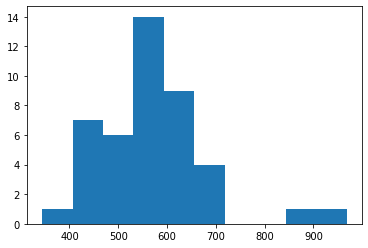

In [10]:
# Plotting histograms of chosen variables
plt.hist(data.consumption)


(array([1., 3., 9., 4., 3., 9., 5., 3., 2., 4.]),
 array([3063. , 3290.9, 3518.8, 3746.7, 3974.6, 4202.5, 4430.4, 4658.3,
        4886.2, 5114.1, 5342. ]),
 <a list of 10 Patch objects>)

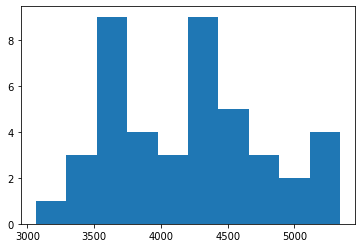

In [11]:
plt.hist(data.income)

Text(0, 0.5, 'consumption')

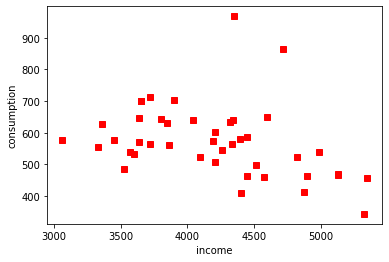

In [12]:
plt.plot(data.income, data.consumption, 'rs')  # Plotting scatter plot to determine correlation
plt.xlabel("income")
plt.ylabel("consumption")

In [13]:
data.consumption.corr(data.income)

-0.3461522033804886

In [14]:
np.corrcoef(data.income, data.consumption)

array([[ 1.       , -0.3461522],
       [-0.3461522,  1.       ]])

In [15]:
model01 = smf.ols("consumption~income", data = data).fit()

In [16]:
model01.params

Intercept    864.053401
income        -0.068908
dtype: float64

In [17]:
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     5.581
Date:                Thu, 30 Jul 2020   Prob (F-statistic):             0.0230
Time:                        13:37:15   Log-Likelihood:                -261.56
No. Observations:                  43   AIC:                             527.1
Df Residuals:                      41   BIC:                             530.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    864.0534    123.369      7.004      0.000     614.905    1113.201
income        -0.0689      0.029     -2.363      0.023      -0.128      -0.010
==============================================================================
Omnibus:                       27.818   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.880
Skew:                           1.761   Prob(JB):                     4.45e-13
Kurtosis:                       7.399   Cond. No.                     3.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Determining Confidence interval
model01.conf_int(0.05) 

,0,1
Intercept,614.905473,1113.201330
income,-0.127813,-0.010003


In [19]:
# Iloc = integer based index gives error here so just using data as whole instead of rows and columns
pred01 = model01.predict(data)

Text(0, 0.5, 'consumption')

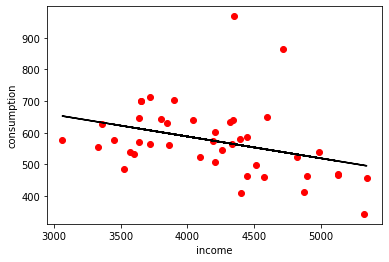

In [20]:
plt.scatter(x=data['income'],y=data['consumption'],color='red');plt.plot(data['income'],pred01,color='black');plt.xlabel('income');plt.ylabel('consumption')

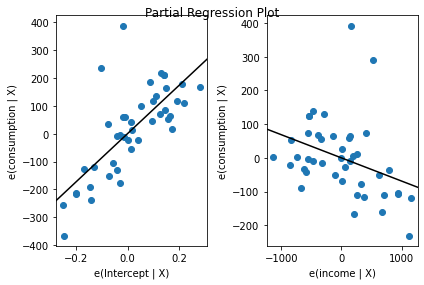

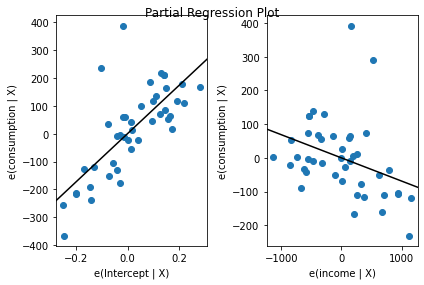

In [21]:
# Residuals on horizontal axis
sm.graphics.plot_partregress_grid(model01)

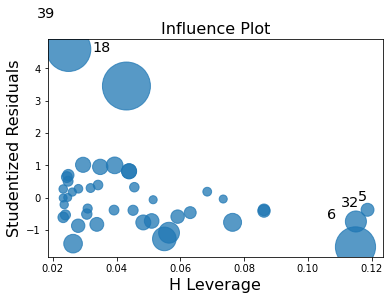

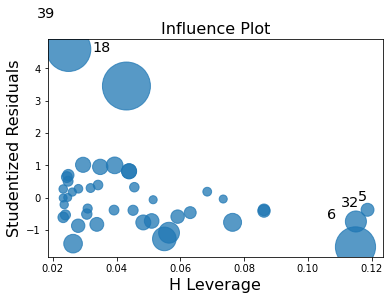

In [22]:
sm.graphics.influence_plot(model01, criterion = "cooks") #Checking influence in order to drop the highest influencing records to make data more accurate 

In [23]:
df = data.drop([18,39])

In [24]:
df.shape

(41, 5)

In [25]:
model02  = smf.ols("consumption ~ income", data = df).fit()

In [26]:
model02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     20.27
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           5.94e-05
Time:                        13:37:51   Log-Likelihood:                -232.00
No. Observations:                  41   AIC:                             468.0
Df Residuals:                      39   BIC:                             471.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    921.7187     81.418     11.321      0.000     757.034    1086.403
income        -0.0870      0.019     -4.502      0.000      -0.126      -0.048
==============================================================================
Omnibus:                        2.726   Durbin-Watson:                   0.949
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                1.431
Skew:                           0.051   Prob(JB):                        0.489
Kurtosis:                       2.090   Cond. No.                     3.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

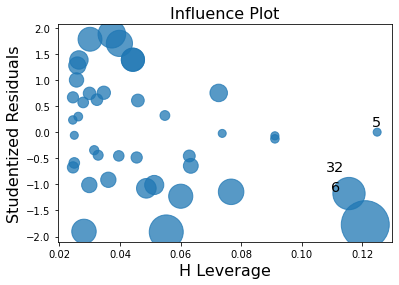

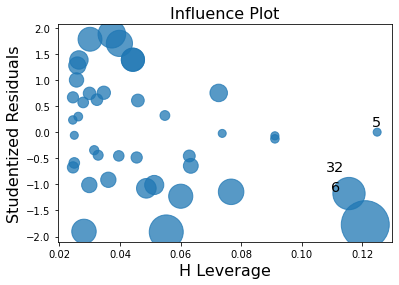

In [27]:
sm.graphics.influence_plot(model02, criteria ="cooks")

In [28]:
#df1 = df.drop([6,32])

In [29]:
#model03 = smf.ols("consumption ~ income", data = df1).fit() # MODEL03 HAS BEEN EXCLUDED BECAUSE IT LOWERED THE RSQUARED VALUE

In [30]:
#model03.summary()

In [31]:
model04 = smf.ols("consumption ~ np.log(income)", data=df).fit()

In [32]:
model04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     17.92
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           0.000136
Time:                        13:38:13   Log-Likelihood:                -232.83
No. Observations:                  41   AIC:                             469.7
Df Residuals:                      39   BIC:                             473.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3464.7306    686.662      5.046      0.000    2075.826    4853.635
np.log(income)  -348.9866     82.447     -4.233      0.000    -515.751    -182.222
==============================================================================
Omnibus:                        2.747   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                1.439
Skew:                           0.056   Prob(JB):                        0.487
Kurtosis:                       2.089   Cond. No.                         512.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model05 = smf.ols("np.log(consumption) ~ income", data = df).fit()

In [34]:
model05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(consumption)   R-squared:                       0.362
Model:                             OLS   Adj. R-squared:                  0.346
Method:                  Least Squares   F-statistic:                     22.12
Date:                 Thu, 30 Jul 2020   Prob (F-statistic):           3.18e-05
Time:                         13:38:20   Log-Likelihood:                 26.155
No. Observations:                   41   AIC:                            -48.31
Df Residuals:                       39   BIC:                            -44.88
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0121      0.150     46.732      0.000       6.709       7.316
income        -0.0002   3.56e-05     -4.703      0.000      -0.000   -9.54e-05
==============================================================================
Omnibus:                        1.368   Durbin-Watson:                   1.048
Prob(Omnibus):                  0.505   Jarque-Bera (JB):                1.193
Skew:                          -0.242   Prob(JB):                        0.551
Kurtosis:                       2.319   Cond. No.                     3.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
pred05 = model05.predict(df['income'])

In [36]:
pred06 = np.exp(pred05)

Text(0, 0.5, 'consumption')

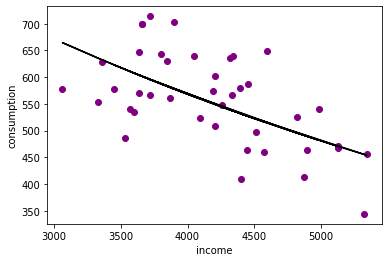

In [37]:
plt.scatter(x=df['income'],y=df['consumption'],color='purple');plt.plot(df.income,np.exp(pred05),color='black');plt.xlabel('income');plt.ylabel('consumption')

(array([3., 4., 4., 4., 3., 6., 7., 4., 3., 3.]),
 array([-134.6005797 , -108.35832712,  -82.11607454,  -55.87382196,
         -29.63156937,   -3.38931679,   22.85293579,   49.09518837,
          75.33744095,  101.57969353,  127.82194611]),
 <a list of 10 Patch objects>)

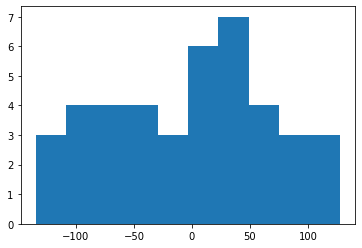

In [38]:
plt.hist(pred06-df.consumption)

In [39]:
import pylab
import scipy.stats as st

((array([-2.12570479, -1.74291212, -1.51528984, -1.34678628, -1.20968671,
         -1.09219094, -0.98810906, -0.89376191, -0.80676941, -0.72549338,
         -0.64875081, -0.57565335, -0.50551158, -0.43777469, -0.37199083,
         -0.30778002, -0.24481487, -0.18280651, -0.12149384, -0.06063494,
          0.        ,  0.06063494,  0.12149384,  0.18280651,  0.24481487,
          0.30778002,  0.37199083,  0.43777469,  0.50551158,  0.57565335,
          0.64875081,  0.72549338,  0.80676941,  0.89376191,  0.98810906,
          1.09219094,  1.20968671,  1.34678628,  1.51528984,  1.74291212,
          2.12570479]),
  array([-134.6005797 , -126.01714373, -118.43085725, -103.42997788,
          -97.21556589,  -97.21556589,  -96.35949285,  -76.16490243,
          -60.04633041,  -58.11999647,  -56.74929968,  -54.1623827 ,
          -48.0601069 ,  -47.90361664,  -44.09571491,  -29.53754443,
          -28.62073761,  -23.50565047,   -3.23424206,   -2.92054331,
           -0.52162745,    3.47837255, 

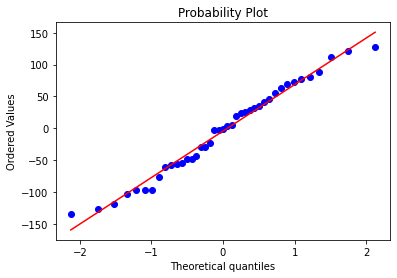

In [40]:
# Drawing Probability Plots
st.probplot(pred06-df.consumption, dist="norm", plot=pylab)

# 3. Multilinear Regression

Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression (MLR) is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable.
y=b0+b1x1+b2x2+....bnxn+e
where,y=dependent variable
x=expanotary variable
b0=y-intercept (constant term)
b1,b2,b3..bn=slope coefficient for each explanotary variable
e= the modeles error term

In [41]:
# MULTILINEAR REGRESSION
# Loading required libraries
import seaborn as sns

In [42]:
data.shape

(43, 5)

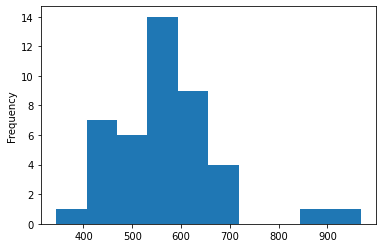

In [43]:
#Plotting histograms of all the variables
data['consumption'].plot.hist()

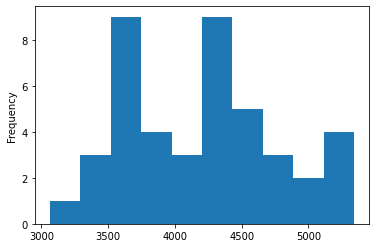

In [44]:
data['income'].plot.hist()

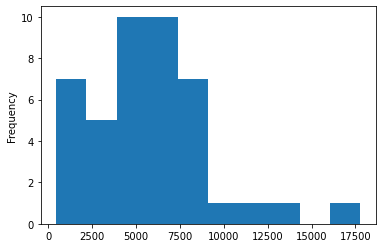

In [45]:
data['miles'].plot.hist()

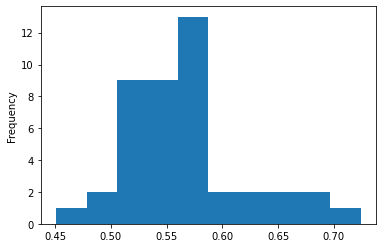

In [46]:
data['permitted_drivers'].plot.hist()

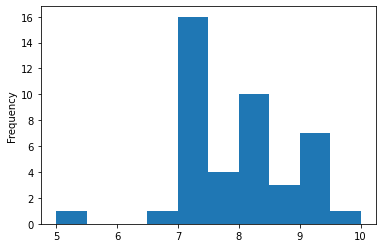

In [47]:
data['petrol_tax'].plot.hist()

In [48]:
data.describe

<bound method NDFrame.describe of     petrol_tax  income  miles  permitted_drivers  consumption
0         9.00    3571   1976              0.525          541
1         9.00    4092   1250              0.572          524
2         9.00    3865   1586              0.580          561
3         7.50    4870   2351              0.529          414
4         8.00    4399    431              0.544          410
5        10.00    5342   1333              0.571          457
6         8.00    5319  11868              0.451          344
7         8.00    5126   2138              0.553          467
8         8.00    4447   8577              0.529          464
9         7.00    4512   8507              0.552          498
10        8.00    4391   5939              0.530          580
11        7.50    5126  14186              0.525          471
12        7.00    4817   6930              0.574          525
13        7.00    4207   6580              0.545          508
14        7.00    4332   8159       

In [49]:
data.corr()          
# For determining collinearity between input variables 
#Consumption taken as independent variable (on y axis)

,petrol_tax,income,miles,permitted_drivers,consumption
petrol_tax,1.000000,0.106608,-0.615053,-0.234345,-0.417710
income,0.106608,1.000000,0.058252,0.060115,-0.346152
miles,-0.615053,0.058252,1.000000,-0.043995,0.067293
permitted_drivers,-0.234345,0.060115,-0.043995,1.000000,0.687106
consumption,-0.417710,-0.346152,0.067293,0.687106,1.000000


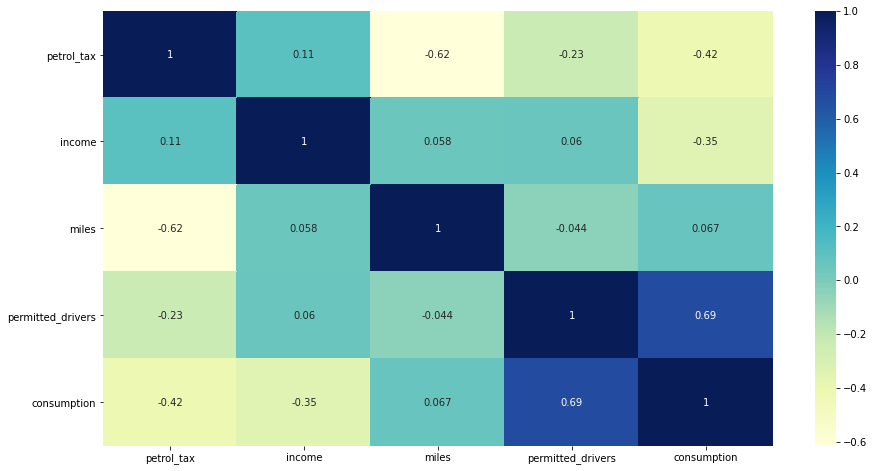

In [50]:
#Plotting heatmap for visualisation and graphical representation
plt.subplots(figsize=(15,8))
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")

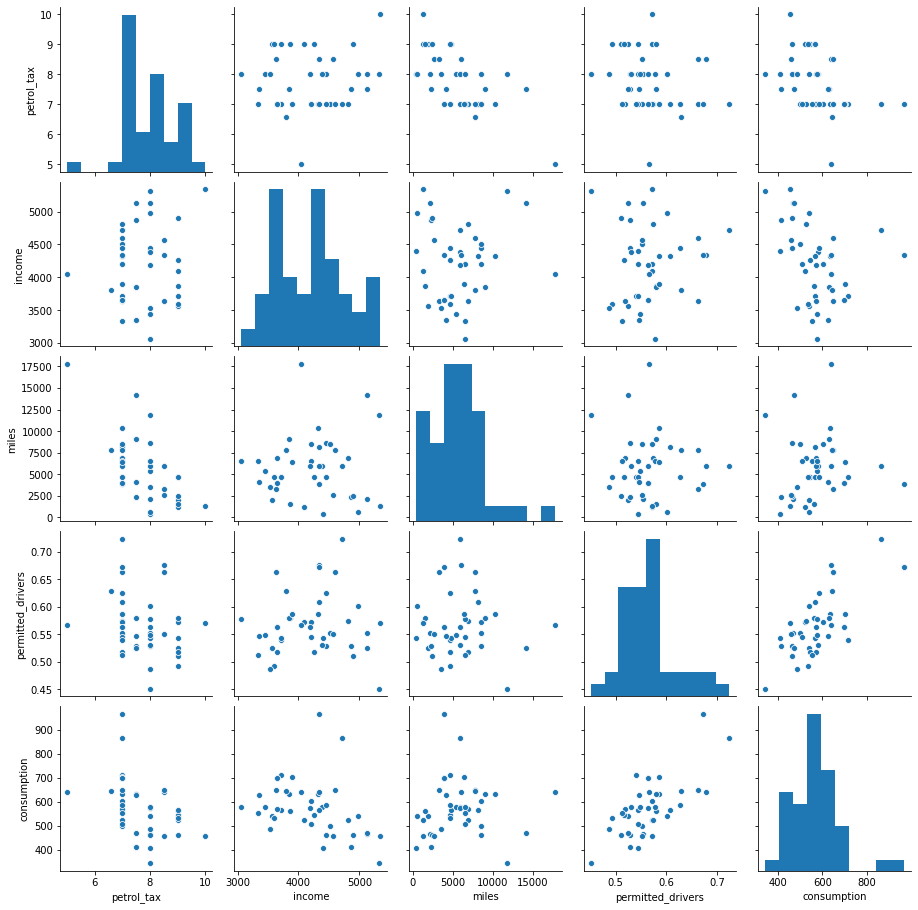

In [51]:
# From the above plots we can deduce that, there exists moderate correlation  between the variables [PETROL_TAX and MILES]
sns.pairplot(data) #Scatter plot between corresponding variables along with histograms

In [52]:
# preparing model based only on petrol_tax
ml_permitted_drivers=smf.ols('consumption~permitted_drivers',data = data).fit()  
ml_permitted_drivers.summary()# preparing model based only on permitted_drivers

# p-value <0.05 .. It is significant 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     36.67
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           3.61e-07
Time:                        13:39:42   Log-Likelihood:                -250.57
No. Observations:                  43   AIC:                             505.1
Df Residuals:                      41   BIC:                             508.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -239.4586    135.149     -1.772      0.084    -512.397      33.480
permitted_drivers  1437.5526    237.398      6.055      0.000     958.117    1916.988
==============================================================================
Omnibus:                        4.318   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                3.416
Skew:                           0.682   Prob(JB):                        0.181
Kurtosis:                       3.216   Cond. No.                         24.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Preparing model based only on miles
ml_miles=smf.ols('consumption~miles',data = data).fit()  
ml_miles.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.1865
Date:                Thu, 30 Jul 2020   Prob (F-statistic):              0.668
Time:                        13:39:46   Log-Likelihood:                -264.21
No. Observations:                  43   AIC:                             532.4
Df Residuals:                      41   BIC:                             535.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    562.8871     33.578     16.764      0.000     495.076     630.699
miles          0.0022      0.005      0.432      0.668      -0.008       0.012
==============================================================================
Omnibus:                       14.914   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.976
Skew:                           1.061   Prob(JB):                     4.60e-05
Kurtosis:                       5.578   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# Preparing model based only on permitted_drivers & miles
ml_both=smf.ols('consumption~permitted_drivers+miles',data = data).fit()  
ml_both.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     18.58
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           1.96e-06
Time:                        13:39:50   Log-Likelihood:                -250.18
No. Observations:                  43   AIC:                             506.4
Df Residuals:                      40   BIC:                             511.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -262.4817    138.220     -1.899      0.065    -541.834      16.871
permitted_drivers  1446.5466    238.399      6.068      0.000     964.724    1928.369
miles                 0.0031      0.004      0.858      0.396      -0.004       0.011
==============================================================================
Omnibus:                        6.334   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                5.286
Skew:                           0.833   Prob(JB):                       0.0711
Kurtosis:                       3.421   Cond. No.                     1.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

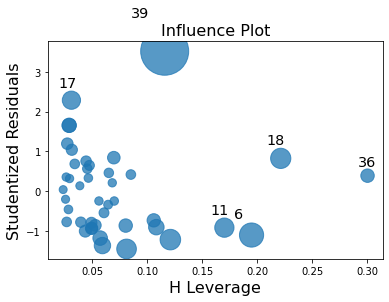

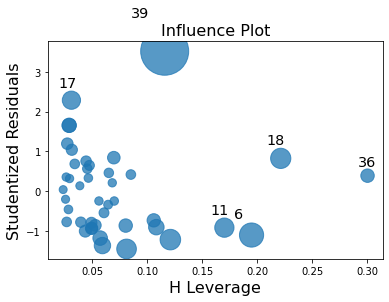

In [55]:
sm.graphics.influence_plot(ml_both)

In [56]:
# index 18,39 is showing high influence so we can exclude that entire row
# Studentized Residuals = Residual/standard deviation of residuals

data_new=data.drop(data.index[[18]],axis=0)
data_new=data.drop(data.index[[39]],axis=0)

In [57]:
# Preparing model                  
ml1 = smf.ols('consumption~permitted_drivers+miles+petrol_tax+income',data=data).fit() # regression model

In [58]:
# Getting coefficients of variables               
ml1.params

Intercept             349.279728
permitted_drivers    1355.642798
miles                  -0.001225
petrol_tax            -30.846750
income                 -0.070889
dtype: float64

In [59]:
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     19.37
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           9.29e-09
Time:                        13:40:13   Log-Likelihood:                -240.41
No. Observations:                  43   AIC:                             490.8
Df Residuals:                      38   BIC:                             499.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           349.2797    208.450      1.676      0.102     -72.706     771.266
permitted_drivers  1355.6428    208.441      6.504      0.000     933.676    1777.609
miles                -0.0012      0.004     -0.307      0.761      -0.009       0.007
petrol_tax          -30.8467     15.725     -1.962      0.057     -62.681       0.987
income               -0.0709      0.019     -3.724      0.001      -0.109      -0.032
==============================================================================
Omnibus:                       14.197   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.264
Skew:                           1.079   Prob(JB):                     0.000178
Kurtosis:                       5.231   Cond. No.                     2.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# index 6,18,36,39 is showing high influence so we can exclude that entire row
# Studentized Residuals = Residual/standard deviation of residuals

data_new=data.drop(data.index[[6]],axis=0)
data_new=data.drop(data.index[[39]],axis=0)

In [61]:
# Preparing corrected model                  
data_new = smf.ols('consumption~permitted_drivers+miles+petrol_tax+income',data=data_new).fit()    

In [63]:
# Getting coefficients of variables        
data_new.params

Intercept             391.594638
permitted_drivers    1167.975139
miles                   0.000921
petrol_tax            -22.718190
income                 -0.075016
dtype: float64

In [64]:
#Summary of new model
data_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     21.89
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           2.48e-09
Time:                        13:40:57   Log-Likelihood:                -226.05
No. Observations:                  42   AIC:                             462.1
Df Residuals:                      37   BIC:                             470.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           391.5946    169.677      2.308      0.027      47.797     735.392
permitted_drivers  1167.9751    174.402      6.697      0.000     814.602    1521.348
miles                 0.0009      0.003      0.281      0.780      -0.006       0.008
petrol_tax          -22.7182     12.906     -1.760      0.087     -48.868       3.432
income               -0.0750      0.015     -4.840      0.000      -0.106      -0.044
==============================================================================
Omnibus:                        3.255   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.508
Skew:                           0.596   Prob(JB):                        0.285
Kurtosis:                       3.106   Cond. No.                     2.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
# CALCULATING VIF FACTORS
#rsq_income = smf.ols('income~miles+permitted_drivers+petrol_tax',data=data_new).fit().rsquared  # residual square 
#vif_income = 1/(1-rsq_income) 
#print(rsq_income , '  ', vif_income)

In [112]:
#rsq_miles = smf.ols('miles~petrol_tax+permitted_drivers+income',data=data_new).fit().rsquared  
#vif_miles = 1/(1-rsq_miles) 
#print(rsq_miles , '  ', vif_miles)

In [113]:
#rsq_petrol_tax= smf.ols('petrol_tax~miles+income+permitted_drivers',data=data_new).fit().rsquared  
#vif_petrol_tax = 1/(1-rsq_petrol_tax) 
#print(rsq_petrol_tax , '  ', vif_petrol_tax)

In [ ]:
#rsq_permitted_drivers = smf.ols('permitted_drivers~miles+income+petrol_tax',data=data_new).fit().rsquared  
#vif_permitted_drivers= 1/(1-rsq_permitted_drivers) 
#print(rsq_permitted_drivers , '  ', vif_permitted_drivers)

In [ ]:
# MULTIPLE REGRESSION END

# 4. XGBOOST

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

Three main forms of gradient boosting are supported: 1)Gradient Boosting algorithm also called gradient boosting machine including the learning rate. 2)Stochastic Gradient Boosting with sub-sampling at the row, column and column per split levels. 3)Regularized Gradient Boosting with both L1 and L2 regularization.

In [145]:
#importing libraries
import xgboost as xgb

In [146]:
#reading the initial entries of the dataset
data.head()

,petrol_tax,income,miles,permitted_drivers,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [147]:
#taking the info regarding the entries in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   petrol_tax         43 non-null     float64
 1   income             43 non-null     int64  
 2   miles              43 non-null     int64  
 3   permitted_drivers  43 non-null     float64
 4   consumption        43 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.8 KB


In [148]:
#knowing the dimensions of the dataset, i.e the no. of rows and col
data.shape

(43, 5)

In [149]:
#importing training and testing dataset
from sklearn.model_selection import train_test_split

In [150]:
#Assigning values to the variables using indentation
X =df.iloc[:,[0,1,2,3]].values
Y =df.iloc[:,[4]].values
#checking the assigned values to the variable
Y

array([[541],
       [524],
       [561],
       [414],
       [410],
       [457],
       [344],
       [467],
       [464],
       [498],
       [580],
       [471],
       [525],
       [508],
       [566],
       [635],
       [603],
       [714],
       [640],
       [649],
       [540],
       [464],
       [547],
       [460],
       [566],
       [577],
       [631],
       [574],
       [534],
       [571],
       [554],
       [577],
       [628],
       [487],
       [644],
       [640],
       [704],
       [648],
       [587],
       [699],
       [699]])

In [151]:
#Splitting the Data
X_train,X_test,y_train,y_test = train_test_split(X , Y , test_size=0.1 , random_state=26)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36, 4)
(5, 4)
(36, 1)
(5, 1)


In [115]:
splitdata=pd.DataFrame(X_train)

In [ ]:
splitdata

In [117]:
splitdata2=pd.DataFrame(X_test)

In [ ]:
splitdata2

In [119]:
splitdata3=pd.DataFrame(y_train)

In [ ]:
splitdata3

In [121]:
splitdata4=pd.DataFrame(y_test)

In [ ]:
splitdata4

In [152]:
#Applying model using xgb
xg_cl=xgb.XGBRegressor()

In [153]:
xg_cl

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [154]:
#fitting the data
xg_cl.fit(X_train,y_train)

[13:59:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [155]:
#Calculating accuracy for training set
xg_cl.score(X_train,y_train)

0.9970166995189238

In [156]:
#Calcuating accuracy for testing set
xg_cl.score(X_test,y_test)

0.5748813817974996

In [88]:
#End of XGBoost